In [1]:
import numpy as np
import seaborn as sns
from classification_methods import Classification_ann
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix

# Modelagem


In [2]:
method = Classification_ann()

# importando dataframe
data = method.import_df('df_white_final.csv')
data


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,0,7.0,0.27,0.36,3.030134,-3.101093,45.0,170.0,1.00100,3.00,0.45,2.174752,1
1,1,6.3,0.30,0.34,0.470004,-3.015935,14.0,132.0,0.99400,3.30,0.49,2.251292,1
2,2,8.1,0.28,0.40,1.931521,-2.995732,30.0,97.0,0.99510,3.26,0.44,2.312535,1
3,3,7.2,0.23,0.32,2.140066,-2.847312,47.0,186.0,0.99560,3.19,0.40,2.292535,1
4,4,6.2,0.32,0.16,1.945910,-3.101093,30.0,136.0,0.99490,3.18,0.47,2.261763,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,3937,5.7,0.21,0.32,-0.105361,-3.270169,38.0,121.0,0.99074,3.24,0.46,2.360854,1
3916,3938,6.2,0.21,0.29,0.470004,-3.244194,24.0,92.0,0.99114,3.27,0.50,2.415914,1
3917,3939,6.6,0.32,0.36,2.079442,-3.057608,57.0,168.0,0.99490,3.15,0.46,2.261763,0
3918,3940,5.5,0.29,0.30,0.095310,-3.816713,20.0,110.0,0.98869,3.34,0.38,2.549445,1


In [3]:
data.drop(columns=['Unnamed: 0'],axis=1, inplace=True)
data['opinion'].value_counts(normalize=True)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,7.0,0.27,0.36,3.030134,-3.101093,45.0,170.0,1.00100,3.00,0.45,2.174752,1
1,6.3,0.30,0.34,0.470004,-3.015935,14.0,132.0,0.99400,3.30,0.49,2.251292,1
2,8.1,0.28,0.40,1.931521,-2.995732,30.0,97.0,0.99510,3.26,0.44,2.312535,1
3,7.2,0.23,0.32,2.140066,-2.847312,47.0,186.0,0.99560,3.19,0.40,2.292535,1
4,6.2,0.32,0.16,1.945910,-3.101093,30.0,136.0,0.99490,3.18,0.47,2.261763,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3915,5.7,0.21,0.32,-0.105361,-3.270169,38.0,121.0,0.99074,3.24,0.46,2.360854,1
3916,6.2,0.21,0.29,0.470004,-3.244194,24.0,92.0,0.99114,3.27,0.50,2.415914,1
3917,6.6,0.32,0.36,2.079442,-3.057608,57.0,168.0,0.99490,3.15,0.46,2.261763,0
3918,5.5,0.29,0.30,0.095310,-3.816713,20.0,110.0,0.98869,3.34,0.38,2.549445,1


In [4]:
# separando x e y
target = 'opinion'

x = data.drop(columns=[target])
y = data[[target]]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train)

In [6]:
# verificando as proporções de classes
method.props(data,target,y_train,y_val,y_test)

,original,treino,val,teste
1,0.66199,0.661882,0.66242,0.66199
0,0.33801,0.338118,0.33758,0.33801


In [7]:
# normalizando os dados
x_train_norm, x_val_norm, x_test_norm = method.scal_data(x_train,x_val,x_test)

 - Utilizaremos 11 camadas intermédias, sendo o numero de dimensões dos dados.
 - Utilizaremos 1 neurônio de saída com ativação sigmoid, pois o objetivo é uma classificação binária.
 - Criaremos um algorítimo de classificação
 - A função de ativação será RElu, pois aprensenta um bom desempenho e constância além de ser simples de utilizar.
 - Como função de otimização usaremos sgd
 - Como avaliação do modelo nos basearemos na precision e recall. Precision porquê queremos evitar os falsos negativos, e recall pois nosso objetivo é que nosso modelo acerte o máximo possível

In [8]:
# criando primeiro modelo
def create_model(x, n_neurons:list):
        '''
        esta função cria uma rede neural
        '''
        model = Sequential()
        
        if len(n_neurons) == 1:
            model.add(Dense(n_neurons[0], input_shape=(11,), activation='relu'))
        else:
            for n in n_neurons:
                if n == n_neurons[0]:
                    model.add(Dense(n_neurons[0], input_shape=(11,), activation='relu'))
                else:
                    model.add(Dense(n, activation='relu'))
                    
        model.add(Dense(1, activation='sigmoid'))
    
        return model

In [9]:
model1 = create_model(x_train_norm, n_neurons=[11])
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 1)                 12        
                                                                 
Total params: 144 (576.00 Byte)
Trainable params: 144 (576.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# compilando o modelo
model1.compile(loss='binary_crossentropy', optimizer='sgd', metrics='Recall')

# treinar o modelo
history1 = model1.fit(x_train_norm, y_train, epochs=200, batch_size=60, validation_data=(x_val_norm, y_val))


Epoch 1/200


42/42 [==============================] - 1s 7ms/step - loss: 0.6683 - recall: 0.9301 - val_loss: 0.6547 - val_recall: 0.9976
Epoch 2/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6478 - recall: 1.0000 - val_loss: 0.6408 - val_recall: 1.0000
Epoch 3/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6385 - recall: 1.0000 - val_loss: 0.6338 - val_recall: 1.0000
Epoch 4/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6337 - recall: 1.0000 - val_loss: 0.6300 - val_recall: 1.0000
Epoch 5/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6307 - recall: 1.0000 - val_loss: 0.6274 - val_recall: 1.0000
Epoch 6/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6287 - recall: 1.0000 - val_loss: 0.6253 - val_recall: 1.0000
Epoch 7/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6270 - recall: 1.0000 - val_loss: 0.6235 - val_recall: 1.0000
Epoch 8/200
42/42 [===================

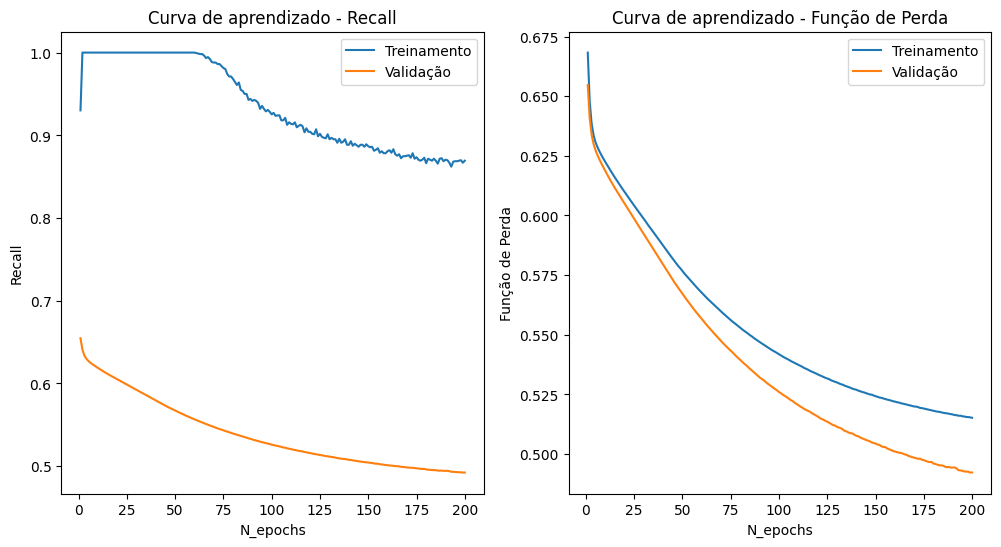

In [11]:
method.plot_history(history1, 200)

In [12]:
# criando segundo modelo
model2 = create_model(x_train_norm, n_neurons=[22])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 22)                264       
                                                                 
 dense_3 (Dense)             (None, 1)                 23        
                                                                 
Total params: 287 (1.12 KB)
Trainable params: 287 (1.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics='Recall')
history2 = model2.fit(x_train_norm, y_train, epochs=200, batch_size=60, validation_data=(x_val_norm, y_val))

Epoch 1/200


42/42 [==============================] - 1s 6ms/step - loss: 0.7278 - recall: 0.2470 - val_loss: 0.7008 - val_recall: 0.5481
Epoch 2/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6835 - recall: 0.8253 - val_loss: 0.6724 - val_recall: 0.9736
Epoch 3/200
42/42 [==============================] - 0s 3ms/step - loss: 0.6639 - recall: 0.9892 - val_loss: 0.6581 - val_recall: 0.9976
Epoch 4/200
42/42 [==============================] - 0s 3ms/step - loss: 0.6534 - recall: 0.9994 - val_loss: 0.6495 - val_recall: 1.0000
Epoch 5/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6470 - recall: 1.0000 - val_loss: 0.6440 - val_recall: 1.0000
Epoch 6/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6427 - recall: 1.0000 - val_loss: 0.6401 - val_recall: 1.0000
Epoch 7/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6398 - recall: 1.0000 - val_loss: 0.6374 - val_recall: 1.0000
Epoch 8/200
42/42 [==============================] - 

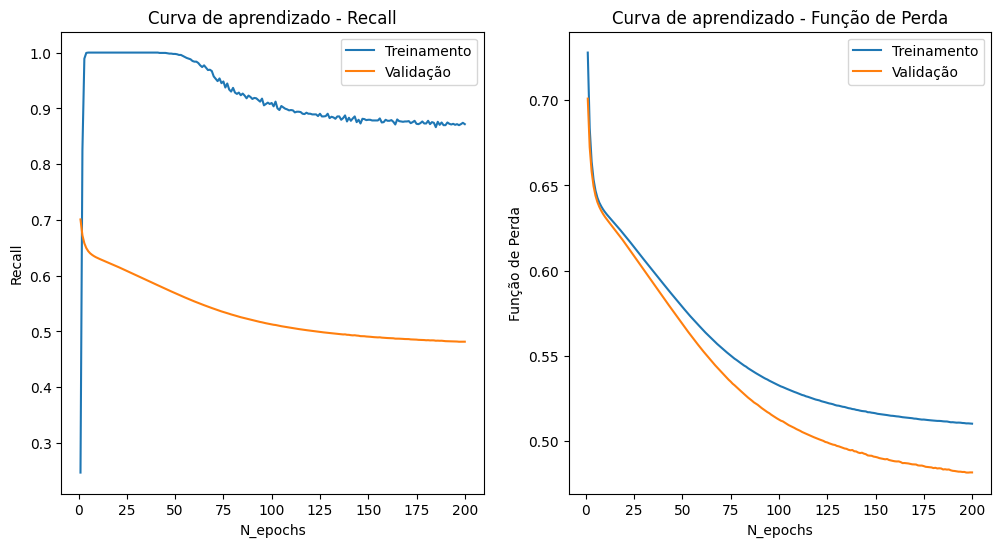

In [14]:
method.plot_history(history2, 200)

In [15]:
# criando terceiro modelo
model3 = create_model(x_train_norm, n_neurons=[10,10])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                120       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 241 (964.00 Byte)
Trainable params: 241 (964.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model3.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['Recall'])
history3 = model3.fit(x_train_norm, y_train, epochs=100, batch_size=60, validation_data=(x_val_norm, y_val))

Epoch 1/100
42/42 [==============================] - 1s 6ms/step - loss: 0.6346 - recall: 1.0000 - val_loss: 0.6299 - val_recall: 1.0000
Epoch 2/100
42/42 [==============================] - 0s 2ms/step - loss: 0.6328 - recall: 1.0000 - val_loss: 0.6278 - val_recall: 1.0000
Epoch 3/100
42/42 [==============================] - 0s 2ms/step - loss: 0.6308 - recall: 1.0000 - val_loss: 0.6257 - val_recall: 1.0000
Epoch 4/100
42/42 [==============================] - 0s 2ms/step - loss: 0.6288 - recall: 1.0000 - val_loss: 0.6236 - val_recall: 1.0000
Epoch 5/100
42/42 [==============================] - 0s 2ms/step - loss: 0.6268 - recall: 1.0000 - val_loss: 0.6214 - val_recall: 1.0000
Epoch 6/100
42/42 [==============================] - 0s 2ms/step - loss: 0.6251 - recall: 1.0000 - val_loss: 0.6197 - val_recall: 1.0000
Epoch 7/100
42/42 [==============================] - 0s 2ms/step - loss: 0.6237 - recall: 1.0000 - val_loss: 0.6182 - val_recall: 1.0000
Epoch 8/100
42/42 [======================

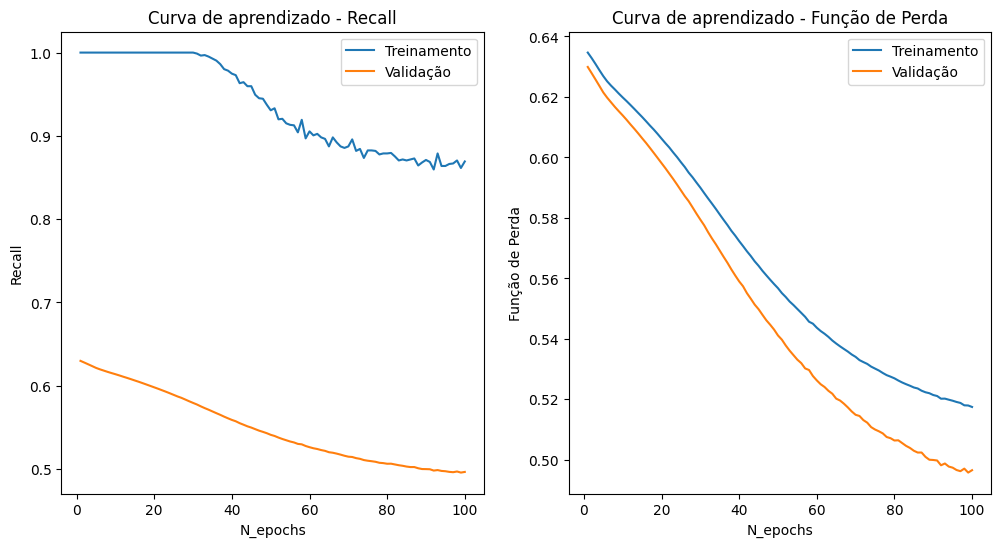

In [17]:
method.plot_history(history3, 100)

In [18]:
list_models = [model1, model2, model3]
list_model_names  = ['ann_11', 'ann_22', 'ann_10x10']

# analisando resultado das redes neurais
def analyze_results(x_test_norm, list_models, list_model_names, THRESHOLD=0.6):
  for i in range(len(list_models)):

    # Faz a previsão na base de teste

    yhat_test = list_models[i].predict(x_test_norm)

    # Transforma em classes

    yhat_test_class = [1 if x >= THRESHOLD else 0 for x in yhat_test]

    # Imprime resultados
    
    print(f'DESEMPENHO DE CLASSIFICAÇÃO - MODELO {i+1} - {list_model_names[i]} - Prob. min = {THRESHOLD}')
    print(classification_report(y_test, yhat_test_class))
   
    print('*' * 50)
    print('\n')

analisando com THRESHOLD = 0.6

In [19]:
analyze_results(x_test_norm, list_models, list_model_names)

25/25 [==============================] - 0s 918us/step
DESEMPENHO DE CLASSIFICAÇÃO - MODELO 1 - ann_11 - Prob. min = 0.6
              precision    recall  f1-score   support

           0       0.61      0.70      0.65       265
           1       0.83      0.77      0.80       519

    accuracy                           0.74       784
   macro avg       0.72      0.73      0.72       784
weighted avg       0.76      0.74      0.75       784

**************************************************


25/25 [==============================] - 0s 876us/step
DESEMPENHO DE CLASSIFICAÇÃO - MODELO 2 - ann_22 - Prob. min = 0.6
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       265
           1       0.84      0.78      0.81       519

    accuracy                           0.75       784
   macro avg       0.73      0.74      0.73       784
weighted avg       0.76      0.75      0.76       784

**************************************************


Analisando com THRESHOLD = 0.3

In [20]:
analyze_results(x_test_norm, list_models, list_model_names, THRESHOLD=0.3)

25/25 [==============================] - 0s 876us/step
DESEMPENHO DE CLASSIFICAÇÃO - MODELO 1 - ann_11 - Prob. min = 0.3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       265
           1       0.66      1.00      0.80       519

    accuracy                           0.66       784
   macro avg       0.33      0.50      0.40       784
weighted avg       0.44      0.66      0.53       784

**************************************************


25/25 [==============================] - 0s 792us/step
DESEMPENHO DE CLASSIFICAÇÃO - MODELO 2 - ann_22 - Prob. min = 0.3
              precision    recall  f1-score   support

           0       0.83      0.13      0.23       265
           1       0.69      0.99      0.81       519

    accuracy                           0.70       784
   macro avg       0.76      0.56      0.52       784
weighted avg       0.74      0.70      0.61       784

**************************************************


Analisando com THRESHOLD = 0.75

In [21]:
analyze_results(x_test_norm, list_models, list_model_names, THRESHOLD=0.75)

25/25 [==============================] - 0s 834us/step
DESEMPENHO DE CLASSIFICAÇÃO - MODELO 1 - ann_11 - Prob. min = 0.75
              precision    recall  f1-score   support

           0       0.50      0.86      0.63       265
           1       0.89      0.56      0.69       519

    accuracy                           0.66       784
   macro avg       0.69      0.71      0.66       784
weighted avg       0.76      0.66      0.67       784

**************************************************


25/25 [==============================] - 0s 792us/step
DESEMPENHO DE CLASSIFICAÇÃO - MODELO 2 - ann_22 - Prob. min = 0.75
              precision    recall  f1-score   support

           0       0.51      0.87      0.64       265
           1       0.89      0.57      0.70       519

    accuracy                           0.67       784
   macro avg       0.70      0.72      0.67       784
weighted avg       0.76      0.67      0.68       784

*************************************************

In [22]:
y_pred = model3.predict(x_test_norm)

y_class = [1 if x >= 0.6 else 0 for x in y_pred]

25/25 [==============================] - 0s 918us/step


Text(0.5, 1.0, 'Matriz de Confusão')

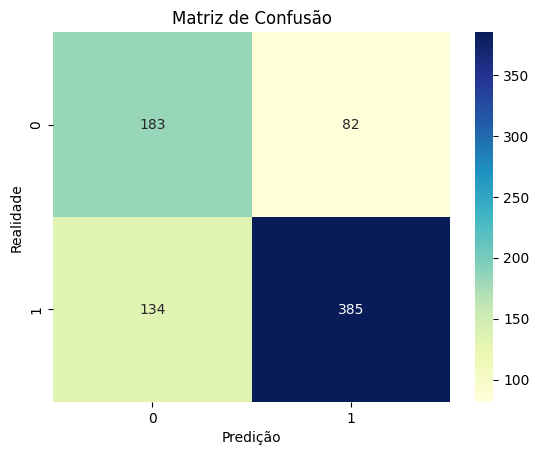

In [23]:
conf_matrix_red = confusion_matrix(y_test, y_class)

ax = sns.heatmap(conf_matrix_red, cmap='YlGnBu', annot=True, fmt='g')
ax.set_xlabel('Predição')
ax.set_ylabel('Realidade')
ax.set_title('Matriz de Confusão')

In [24]:
yhat_hist_train = model3.predict(x_train_norm)

79/79 [==============================] - 0s 860us/step


In [25]:
yhat_hist_test = model3.predict(x_test_norm)

25/25 [==============================] - 0s 751us/step


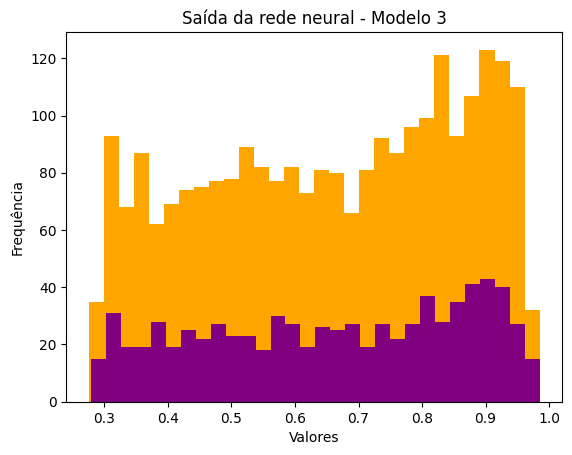

In [26]:
method.create_hist(yhat_hist_train, yhat_hist_test)

Com isso concluímos que nosso melhor modelo foi o Modelo 3, com duas camadas de 10 neurônios cada. E a probabilidade mínima de 0.6

Atingindo:

 - 72% de precision
 - 73% de recall